In [2]:
import csv
from scipy import ndimage
from scipy import linalg
import numpy as np
import nibabel as nib
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import pickle

In [3]:
#loading images in
cwd = os.getcwd()#return current working directory
#patient_id_AD = os.listdir('GRAY_Jan27/GRAY/AD') #create a list that encompasses all the images we downloaded
patient_id_MCI = os.listdir('GRAY_Jan27/GRAY/MCI')
patient_id_CN = os.listdir('GRAY_Jan27/GRAY/CN')
print(patient_id_MCI)

['mwc1002_S_1268.nii', 'mwc1133_S_0792.nii', 'mwc1127_S_0112.nii', 'mwc1133_S_0727.nii', 'mwc1031_S_1066.nii', 'mwc1127_S_0925.nii', 'mwc1126_S_0709.nii', 'mwc1141_S_1244.nii', 'mwc1127_S_0394.nii', 'mwc1010_S_0422.nii', 'mwc1041_S_1260.nii', 'mwc1027_S_1045.nii', 'mwc1098_S_0269.nii', 'mwc1003_S_0908.nii', 'mwc1126_S_1187.nii', 'mwc1016_S_1326.nii', 'mwc1141_S_1052.nii', 'mwc1057_S_0941.nii', 'mwc1023_S_0388.nii', 'mwc1100_S_1154.nii', 'mwc1033_S_0922.nii', 'mwc1130_S_0505.nii', 'mwc1011_S_1282.nii', 'mwc1128_S_0611.nii', 'mwc1041_S_1412.nii', 'mwc1037_S_1078.nii', 'mwc1131_S_0409.nii', 'mwc1023_S_0625.nii', 'mwc1024_S_1400.nii', 'mwc1031_S_0830.nii', 'mwc1032_S_0978.nii', 'mwc1022_S_0750.nii', 'mwc1041_S_0446.nii', 'mwc1068_S_0401.nii', 'mwc1127_S_1032.nii', 'mwc1094_S_0531.nii', 'mwc1027_S_0408.nii', 'mwc1082_S_0832.nii', 'mwc1018_S_0406.nii', 'mwc1099_S_0054.nii', 'mwc1052_S_1346.nii', 'mwc1123_S_1300.nii', 'mwc1067_S_0045.nii', 'mwc1018_S_0155.nii', 'mwc1037_S_1421.nii', 'mwc1067_

In [4]:
#print("GRAY_Jan25/GRAY/AD/" + patient_id_AD[0])

In [5]:
#filename = glob.glob('data/' + '*/data_batch*')
        
#Gaining sMRI        
    #datapath: obtain the path to reach each patient's sMRI 
#datapath_AD = [] #[patient_id, path]
datapath_CN = []
datapath_MCI = []
#for patient in patient_id_AD:
    #print("GRAY_Jan25/GRAY/AD/" + patient)
    #for root, dirs, files in os.walk("GRAY_Jan25/GRAY/AD/" + patient): 
        #print("GRAY_Jan25/GRAY/AD/" + patient)
        #for file in files:
            #if file.endswith(".nii"):
    #datapath_AD.append([patient, "GRAY_Jan27/GRAY/AD/" + patient])
for patient in patient_id_CN:
    datapath_CN.append([patient, "GRAY_Jan27/GRAY/CN/" + patient])              
    #sMRIs were loaded and reshaped into the targeted dim[256, 256, 160] 
for patient in patient_id_MCI:
    datapath_MCI.append([patient, "GRAY_Jan27/GRAY/MCI/" + patient])
print(datapath_MCI)

[['mwc1002_S_1268.nii', 'GRAY_Jan27/GRAY/MCI/mwc1002_S_1268.nii'], ['mwc1133_S_0792.nii', 'GRAY_Jan27/GRAY/MCI/mwc1133_S_0792.nii'], ['mwc1127_S_0112.nii', 'GRAY_Jan27/GRAY/MCI/mwc1127_S_0112.nii'], ['mwc1133_S_0727.nii', 'GRAY_Jan27/GRAY/MCI/mwc1133_S_0727.nii'], ['mwc1031_S_1066.nii', 'GRAY_Jan27/GRAY/MCI/mwc1031_S_1066.nii'], ['mwc1127_S_0925.nii', 'GRAY_Jan27/GRAY/MCI/mwc1127_S_0925.nii'], ['mwc1126_S_0709.nii', 'GRAY_Jan27/GRAY/MCI/mwc1126_S_0709.nii'], ['mwc1141_S_1244.nii', 'GRAY_Jan27/GRAY/MCI/mwc1141_S_1244.nii'], ['mwc1127_S_0394.nii', 'GRAY_Jan27/GRAY/MCI/mwc1127_S_0394.nii'], ['mwc1010_S_0422.nii', 'GRAY_Jan27/GRAY/MCI/mwc1010_S_0422.nii'], ['mwc1041_S_1260.nii', 'GRAY_Jan27/GRAY/MCI/mwc1041_S_1260.nii'], ['mwc1027_S_1045.nii', 'GRAY_Jan27/GRAY/MCI/mwc1027_S_1045.nii'], ['mwc1098_S_0269.nii', 'GRAY_Jan27/GRAY/MCI/mwc1098_S_0269.nii'], ['mwc1003_S_0908.nii', 'GRAY_Jan27/GRAY/MCI/mwc1003_S_0908.nii'], ['mwc1126_S_1187.nii', 'GRAY_Jan27/GRAY/MCI/mwc1126_S_1187.nii'], ['mwc1016

In [6]:
#import scipy.misc
#import matplotlib.pyplot as plt

#dataimage_AD = []#[patient_id, image_matrix_normalized]
#slice_AD = []
#dataimage_CN = []
#slice_CN = []
#dataimage_MCI = []#[patient_id, image_matrix_normalized]
#slice_MCI = []
#tar_dim = [121, 121]

#mri = nib.load("GRAY_Jan27/GRAY/AD/" + patient_id_AD[0]).get_data()
#mri = (mri - mri.min())/(mri.max() - mri.min())
#mri = mri - mri.mean()
#    #mri = scipy.misc.imresize(mri, (121, 121, 121))
#dataimage_AD.append(mri)
#print("hey0")
#print(mri.shape)
#slice = np.zeros((3, 121, 121))
    
#slice[0,:,:] = ndimage.zoom(mri[57,:,:],[tar_dim[0]/mri[57,:,:].shape[0],tar_dim[1]/mri[57,:,:].shape[1]], order = 1)
#    #slice[:,:,0] = mri[78,:,:]
##slice[0,:,:] = slice[0,:,:] + np.random.normal(0, 0.05, (121, 121))
#print(slice[0,:,:].shape)

#plt.figure(0)
#plt.imshow(slice[0,:,:], 'gray')

In [7]:
#slice[0,:,:] = slice[0,:,:] + np.random.normal(0, 0.01, (121, 121))
#print(slice[0,:,:].shape)

#plt.figure(0)
#plt.imshow(slice[0,:,:], 'gray')

In [8]:
import scipy.misc

#dataimage_AD = []#[patient_id, image_matrix_normalized]
#slice_AD = []
dataimage_CN = []
slice_CN = []
dataimage_MCI = []#[patient_id, image_matrix_normalized]
slice_MCI = []
tar_dim = [121, 121]

for patient in patient_id_CN:
    mri = nib.load("GRAY_Jan27/GRAY/CN/" + patient).get_data()
    mri = (mri - mri.min())/(mri.max() - mri.min())
    mri = mri - mri.mean()
    #mri = scipy.misc.imresize(mri, (121, 121, 121))
    dataimage_CN.append(mri)
    print("hey0")
    print(mri.shape)
    slice = np.zeros((3, 121, 121))
    
    slice[0,:,:] = ndimage.zoom(mri[78,:,:],[tar_dim[0]/mri[57,:,:].shape[0],tar_dim[1]/mri[57,:,:].shape[1]], order = 1)
    #slice[:,:,0] = mri[78,:,:]
    print("hey1")
    slice[1,:,:] = mri[:,79,:]
    print("hey2")
    #slice[:,:,2] = mri[:,:,57]
    slice[2,:,:] = ndimage.zoom(mri[:,:,57],[tar_dim[0]/mri[:,:,78].shape[0],tar_dim[1]/mri[:,:,78].shape[1]], order = 1)
    print("hey3")
    print(slice.shape)
    slice_CN.append(slice)

for patient in patient_id_MCI:
    mri = nib.load("GRAY_Jan27/GRAY/MCI/" + patient).get_data()
    mri = (mri - mri.min())/(mri.max() - mri.min())
    mri = mri - mri.mean()
    #mri = scipy.misc.imresize(mri, (121, 121, 121))
    dataimage_MCI.append(mri)
    print("hey0")
    print(mri.shape)
    slice = np.zeros((3, 121, 121))
    
    slice[0,:,:] = ndimage.zoom(mri[78,:,:],[tar_dim[0]/mri[57,:,:].shape[0],tar_dim[1]/mri[57,:,:].shape[1]], order = 1)
    #slice[:,:,0] = mri[78,:,:]
    print("hey1")
    slice[1,:,:] = mri[:,79,:]
    print("hey2")
    #slice[:,:,2] = mri[:,:,57]
    slice[2,:,:] = ndimage.zoom(mri[:,:,57],[tar_dim[0]/mri[:,:,78].shape[0],tar_dim[1]/mri[:,:,78].shape[1]], order = 1)
    print("hey3")
    print(slice.shape)
    slice_MCI.append(slice)

print(slice_MCI[33])

hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)


hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2


hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)


hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)
hey0
(121, 145, 121)
hey1
hey2
hey3
(3, 121, 121)


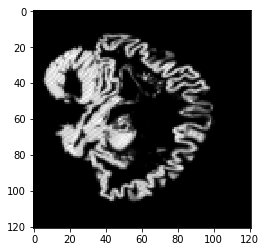

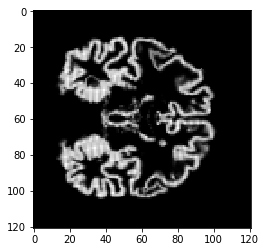

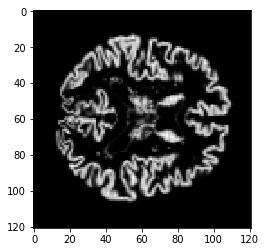

In [9]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(slice_MCI[1][0,:,:], 'gray')
plt.figure(1)
plt.imshow(slice_MCI[1][1,:,:], 'gray')
plt.figure(2)
plt.imshow(slice_MCI[1][2,:,:], 'gray')


In [10]:
slice_CN_MCI = []

for im in slice_CN:
    slice_CN_MCI.append(im)
print(len(slice_CN_MCI))
for im in slice_MCI:
    slice_CN_MCI.append(im)
print(len(slice_CN_MCI))

228
629


In [10]:
#np.save("GRAY_AD_Jan25.npy", slice_AD)
#np.save("GRAY_CN_Jan25.npy", slice_CN)
#np.save("GRAY_MCI_Jan25.npy", slice_MCI)


In [11]:
np.save("GRAY_CN_MCI_Feb2.npy", slice_CN_MCI)

817
